In [1]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [3]:
from keras.utils import plot_model

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

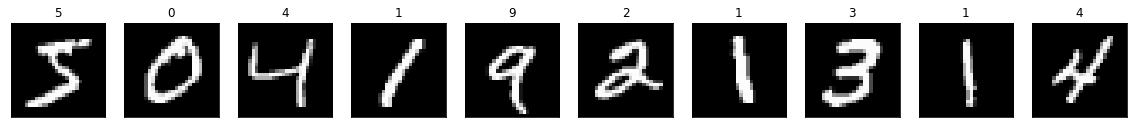

In [6]:
fig, axes = plt.subplots(ncols=10, sharex=False,
        sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [7]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               540900    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

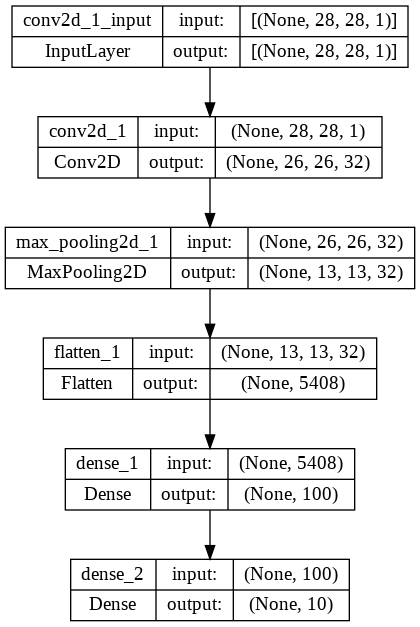

In [14]:
utils.plot_model(model, show_shapes=True)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=2, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/2
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1336 - accuracy: 0.9593 - val_loss: 0.0628 - val_accuracy: 0.9810
Epoch 2/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0463 - val_accuracy: 0.9847


In [16]:
model.save('mnist_cnn_model.h5')

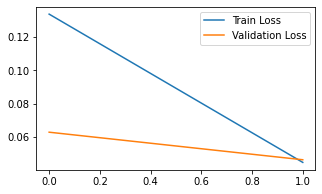

In [17]:
plt.figure(figsize=(5,3))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()

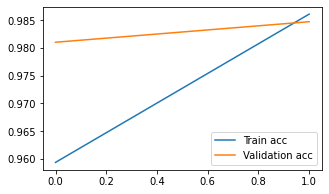

In [18]:
plt.figure(figsize=(5,3))
plt.plot(model.history.history['accuracy'], label='Train acc')
plt.plot(model.history.history['val_accuracy'], label='Validation acc')
plt.legend()

In [19]:
model = keras.models.load_model('mnist_cnn_model.h5')

In [22]:
x = np.reshape(X_test[2], (1, 28, 28, 1))

np.argmax(model.predict(x))

1/1 [==============================] - 0s 106ms/step


1